In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [18]:
df= pd.read_csv("../Data/BrentOilPrices.csv")
brent_oil=pd.read_csv("../Data/BrentOilPrices.csv")
brent_oil['Date'] = pd.to_datetime(brent_oil['Date'])


C:\Users\lenovo\AppData\Local\Temp\ipykernel_2720\2998832070.py:3: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [3]:
df=pd.read_csv("../Data/BrentOilPrices.csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)
brent_oil=pd.read_csv("../Data/BrentOilPrices.csv", parse_dates=["Date"])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2720\1139849646.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df=pd.read_csv("../Data/BrentOilPrices.csv", parse_dates=["Date"])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_2720\1139849646.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brent_oil=pd.read_csv("../Data/BrentOilPrices.csv", parse_dates=["Date"])


In [4]:
df.head()
df.info

<bound method DataFrame.info of             Price
Date             
1987-05-20  18.63
1987-05-21  18.45
1987-05-22  18.55
1987-05-25  18.60
1987-05-26  18.63
...           ...
2022-11-08  96.85
2022-11-09  93.05
2022-11-10  94.25
2022-11-11  96.37
2022-11-14  93.59

[9011 rows x 1 columns]>

In [5]:
df.isnull().sum()

Price    0
dtype: int64

Graph_for oil_price

# Basic exploration of the data

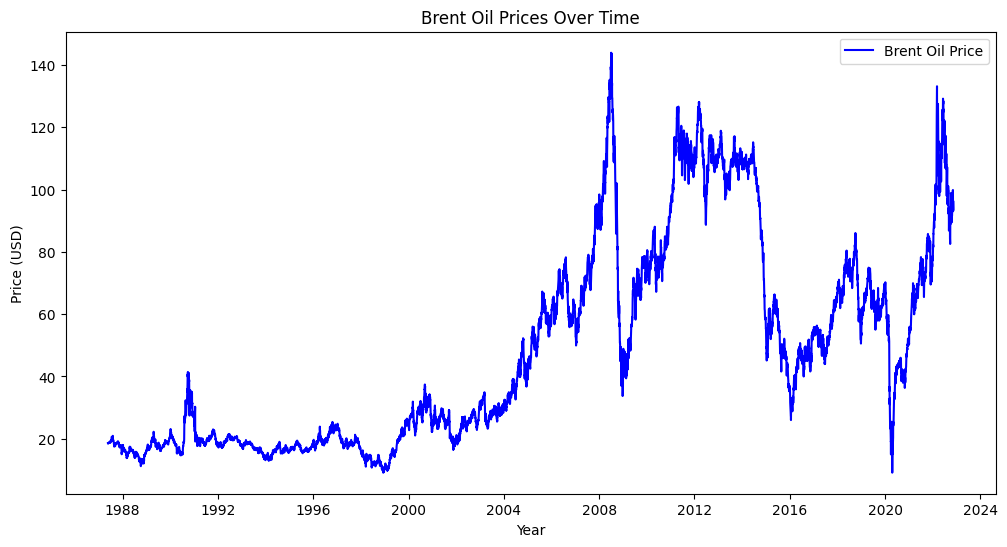

In [6]:
def plot_prices(df):
    """Plots oil prices over time."""
    plt.figure(figsize=(12,6))
    plt.plot(df.index, df['Price'], label="Brent Oil Price", color="blue")
    plt.xlabel("Year")
    plt.ylabel("Price (USD)")
    plt.title("Brent Oil Prices Over Time")
    plt.legend()
    plt.show()


plot_prices(df)



# Price shift in percent

In [7]:

def detect_price_shocks(df, threshold=5):
    """Detects significant price changes based on percentage change threshold."""
    df["Price_Change"] = df["Price"].pct_change() * 100
    return df[abs(df["Price_Change"]) > threshold]

detect_price_shocks(df)


,Price,Price_Change
Date,,
1987-12-14,16.80,-5.245347
1987-12-17,15.03,-5.649718
1987-12-22,16.70,8.441558
1988-01-08,16.88,-5.698324
1988-07-07,15.50,6.896552
...,...,...
2022-07-12,106.98,-6.852416
2022-07-22,106.77,-5.354135
2022-08-15,98.25,-5.255545


# Change Point analysis

In [8]:
import sys
import os
sys.path.append(os.path.abspath(".."))

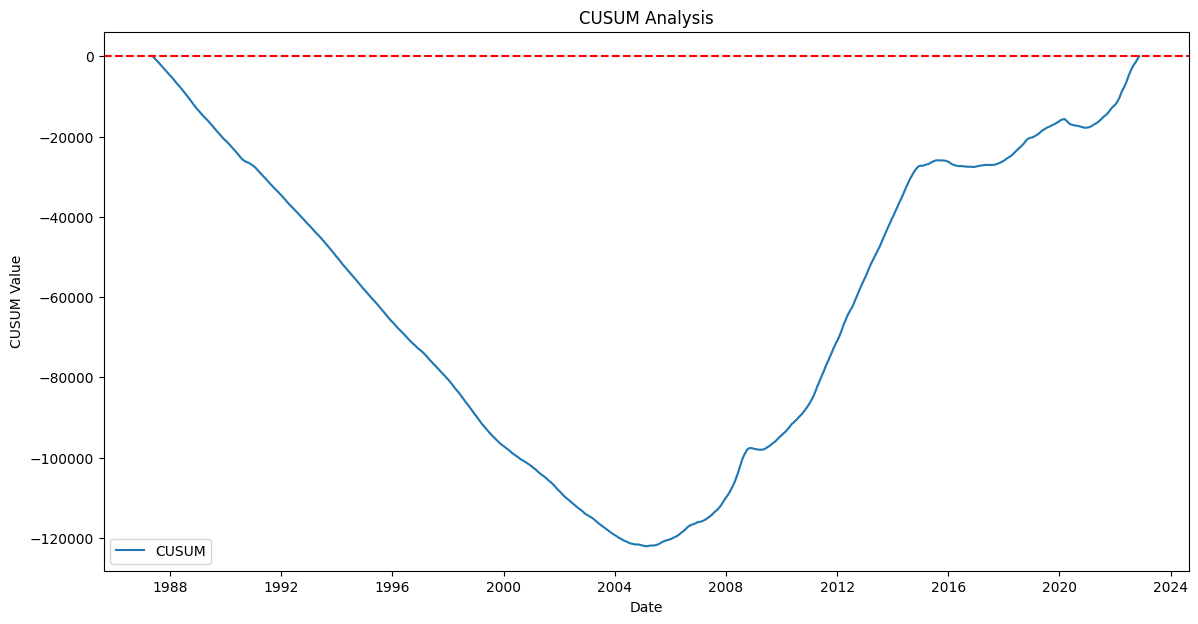

In [9]:
from scripts.cusum_analysis import *
from scripts.cusum_analysis import calculate_cusum, plot_cusum


# Calculate the CUSUM
cusum = calculate_cusum(df)

# Plot the results
plot_cusum(df, cusum)


# Change point analysis using rupture

In [10]:
from scripts.change_point_analysis import *

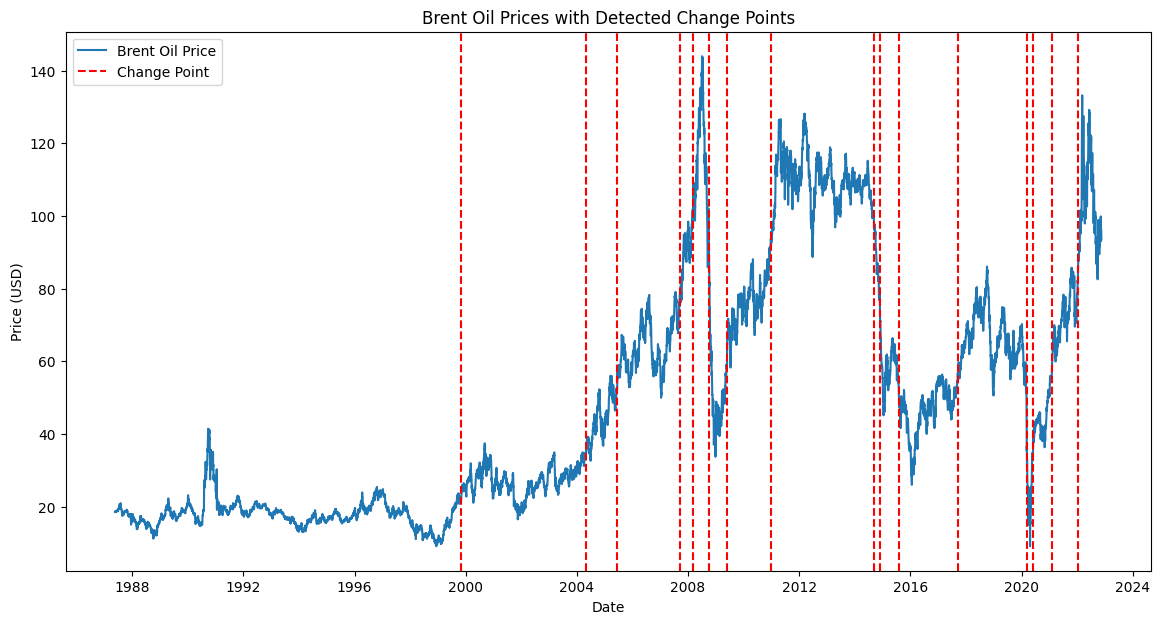

In [11]:
# Detect change points
change_points = detect_change_points(df, penalty=20, model="rbf")

# Plot the change points
plot_change_points(df, change_points)

In [12]:
change_point_dates = df.index[change_points[:-1]].tolist()

In [13]:
change_point_dates

[Timestamp('1999-11-02 00:00:00'),
 Timestamp('2004-05-04 00:00:00'),
 Timestamp('2005-06-16 00:00:00'),
 Timestamp('2007-09-12 00:00:00'),
 Timestamp('2008-03-06 00:00:00'),
 Timestamp('2008-10-08 00:00:00'),
 Timestamp('2009-05-29 00:00:00'),
 Timestamp('2010-12-21 00:00:00'),
 Timestamp('2014-09-08 00:00:00'),
 Timestamp('2014-12-02 00:00:00'),
 Timestamp('2015-08-04 00:00:00'),
 Timestamp('2017-09-19 00:00:00'),
 Timestamp('2020-03-09 00:00:00'),
 Timestamp('2020-05-29 00:00:00'),
 Timestamp('2021-02-03 00:00:00'),
 Timestamp('2022-01-14 00:00:00')]

# Merging and visualization for Datasets collected from internet about change points

In [14]:
# Create a DataFrame for change points
change_points_df = pd.DataFrame(change_point_dates, columns=['change_point_date'])

# Extract corresponding Brent oil prices at change points
change_points_df['oil_price'] = brent_oil.set_index('Date').loc[change_point_dates].reset_index()['Price']
# Save to CSV
# Add any additional information you want to include
change_points_df['event_description'] = ['Economic demad', 'economic demand','OPEC policy&demand' 'finanicial crisis& confict','demand','economic growth& geopolitics','finanicial crisis','finanicial crisis','increased demand','economy demand','increased supply','massive supply','OPEC policy','COVID-19','Covid-19','economic recovery','Russia-Ukarain war']  # Example descriptions
change_points_df.to_csv('change_points.csv', index=False)

In [15]:
# Import the function from the plotting module
import sys
sys.path.append('./scripts')
from scripts.oil_price_visualization import scatter_plot_with_color_coding
# Define the paths to your data files
historical_file = '../Data/BrentOilPrices.csv'
change_points_file = 'change_points.csv'

# Call the function to create the plot
scatter_plot_with_color_coding(historical_file, change_points_file)

c:\Users\lenovo\OneDrive\Desktop\10Academy Files\WEEK_10\Birhan-Energies\scripts\oil_price_visualization.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  historical_data['Date'] = pd.to_datetime(historical_data['Date'])


ARIMA MODEL FOR TIMESEIRES FORCAST

c:\Users\lenovo\OneDrive\Desktop\10Academy Files\WEEK_10\Birhan-Energies\week10\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                        Markov Switching Model Results                        
Dep. Variable:                  Price   No. Observations:                 9011
Model:               MarkovRegression   Log Likelihood              -35281.967
Date:                Tue, 25 Feb 2025   AIC                          70575.934
Time:                        20:41:06   BIC                          70618.571
Sample:                             0   HQIC                         70590.441
                               - 9011                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.0441      0.088    227.669      0.000      19.872      20.217
sigma2        26.3180      0.704     37.394      0.0

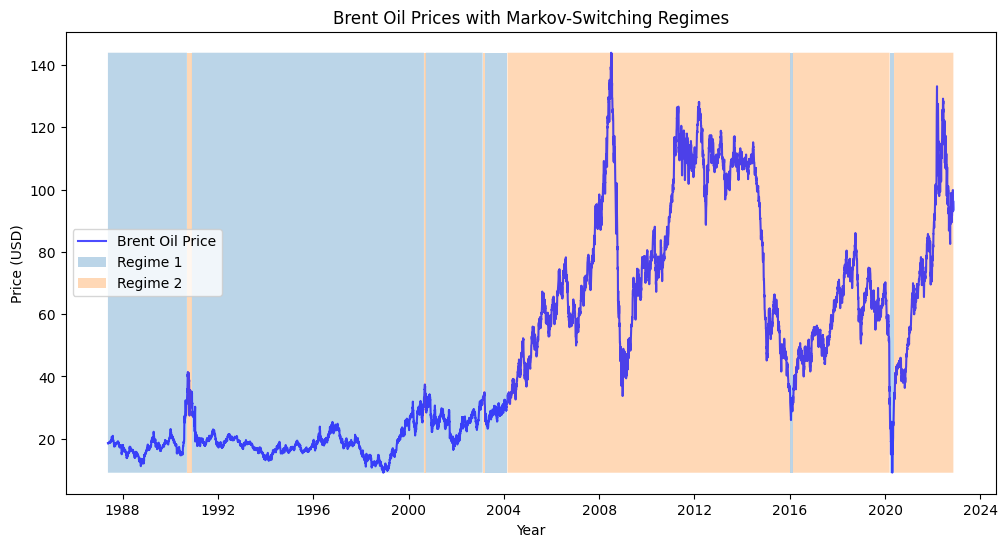

In [ ]:
from scripts.arma_model_train import fit_ms_arima

# Fit Markov-Switching AR Model
ms_arima_results = fit_ms_arima(df, n_states=2, ar_order=1)


🔹 Fitting MS-AR(1) model with 2 regimes...
✅ Model with 2 regimes: AIC = 70575.93350171208

🔹 Fitting MS-AR(1) model with 3 regimes...


c:\Users\lenovo\OneDrive\Desktop\10Academy Files\WEEK_10\Birhan-Energies\week10\Lib\site-packages\statsmodels\tsa\regime_switching\markov_switching.py:1292: EstimationWarning:

Invalid regime transition probabilities estimated in EM iteration; probabilities have been re-scaled to continue estimation.

c:\Users\lenovo\OneDrive\Desktop\10Academy Files\WEEK_10\Birhan-Energies\week10\Lib\site-packages\statsmodels\tsa\regime_switching\markov_switching.py:1292: EstimationWarning:

Invalid regime transition probabilities estimated in EM iteration; probabilities have been re-scaled to continue estimation.

c:\Users\lenovo\OneDrive\Desktop\10Academy Files\WEEK_10\Birhan-Energies\week10\Lib\site-packages\statsmodels\tsa\regime_switching\markov_switching.py:1292: EstimationWarning:

Invalid regime transition probabilities estimated in EM iteration; probabilities have been re-scaled to continue estimation.



✅ Model with 3 regimes: AIC = 64517.85262842888

🔹 Fitting MS-AR(1) model with 4 regimes...


c:\Users\lenovo\OneDrive\Desktop\10Academy Files\WEEK_10\Birhan-Energies\week10\Lib\site-packages\statsmodels\tsa\regime_switching\markov_switching.py:1292: EstimationWarning:

Invalid regime transition probabilities estimated in EM iteration; probabilities have been re-scaled to continue estimation.

c:\Users\lenovo\OneDrive\Desktop\10Academy Files\WEEK_10\Birhan-Energies\week10\Lib\site-packages\statsmodels\tsa\regime_switching\markov_switching.py:1292: EstimationWarning:

Invalid regime transition probabilities estimated in EM iteration; probabilities have been re-scaled to continue estimation.

c:\Users\lenovo\OneDrive\Desktop\10Academy Files\WEEK_10\Birhan-Energies\week10\Lib\site-packages\statsmodels\tsa\regime_switching\markov_switching.py:1292: EstimationWarning:

Invalid regime transition probabilities estimated in EM iteration; probabilities have been re-scaled to continue estimation.

c:\Users\lenovo\OneDrive\Desktop\10Academy Files\WEEK_10\Birhan-Energies\week10\Lib\site-pa

✅ Model with 4 regimes: AIC = 57929.948784101056

🏆 Best Model Selected:
                        Markov Switching Model Results                        
Dep. Variable:                  Price   No. Observations:                 9011
Model:               MarkovRegression   Log Likelihood              -28944.974
Date:                Tue, 25 Feb 2025   AIC                          57929.949
Time:                        21:43:46   BIC                          58072.073
Sample:                             0   HQIC                         57978.307
                               - 9011                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.2461      0.048    358.681      0.000    

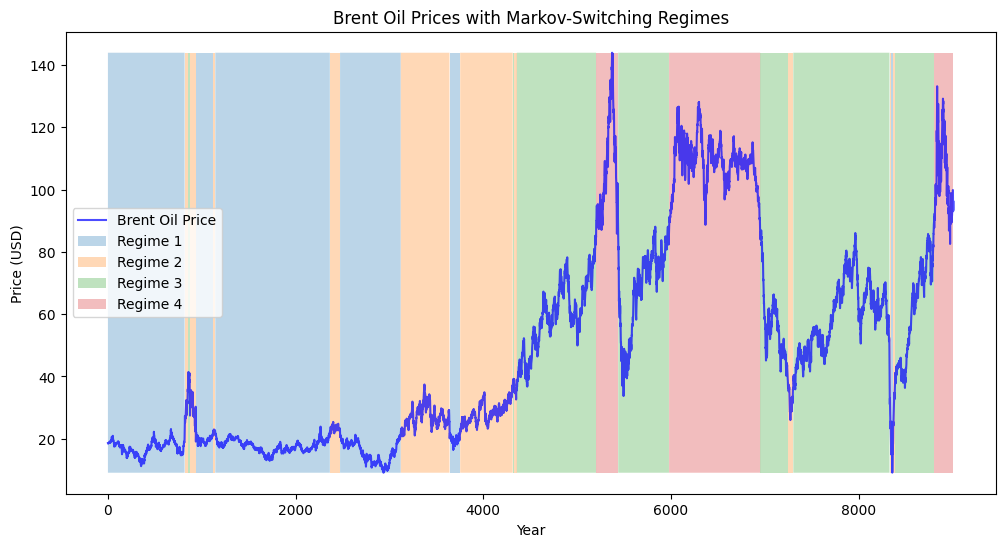

In [23]:
from scripts.arma_model import *
from scripts.arma_model import model_arima

best_ms_arima_model = model_arima(df, n_states_list=[2, 3, 4], ar_order=1)